Let's start the journey by `imports`

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from NeuralNetwork import Perceptron, MLP

Next step: curate truth tables for `OR`, `AND`, `XOR`. 

In [ ]:
combinations = [[0,0], [0,1], [1,0], [1,1]]
result_or = [0, 1, 1, 1]
result_and = [0, 0, 0, 1]
result_xor = [0, 1, 1, 0]

Create single-layer perceptrons for each logic function. Make sure they learn and update their values for the examples. 

In [ ]:
perceptron_or = Perceptron()
err_or = perceptron_or.updateValues(x=combinations, expected=result_or)

perceptron_and = Perceptron()
err_and = perceptron_and.updateValues(x=combinations, expected=result_and)

perceptron_xor = Perceptron()
err_xor = perceptron_xor.updateValues(x=combinations, expected=result_xor)

Seen below, the machine is able to learn `OR` and `AND` functions—evident from the sudden decrease at some point of epoch increase.

On the other hand, it fails to learn `XOR`—also evident from INCREASING error.

In [ ]:
plt.plot(err_or)
plt.title("OR ERROR")
plt.xlabel("epoch")
plt.ylabel("ERR")
plt.show()

plt.plot(err_and)
plt.title("AND ERROR")
plt.xlabel("epoch")
plt.ylabel("ERR")
plt.show()

plt.plot(err_xor)
plt.title("XOR ERROR")
plt.xlabel("epoch")
plt.ylabel("ERR")
plt.show()

Let's train!

This is where we divide the data to training-test-validation, and start training.

In [3]:
features = np.genfromtxt("data/features.txt", delimiter=",")
targets = np.genfromtxt("data/targets.txt", delimiter=",")
targets = pd.get_dummies(targets).to_numpy()
unknown = np.genfromtxt("data/unknown.txt", delimiter=",")
labels = np.unique("data/targets.txt")

num_samples = len(features)
num_training = int(0.7 * num_samples)
num_validation = int(0.15 * num_samples)
num_test = num_samples - num_training - num_validation

indices = np.arange(num_samples)
np.random.shuffle(indices)
features = features[indices]
targets = targets[indices]

training_x = features[:num_training]
training_y = targets[:num_training]
validation_x = features[num_training:num_training+num_validation]
validation_y = targets[num_training:num_training+num_validation]
test_x = features[num_training+num_validation:]
test_y = targets[num_training+num_validation:]

Next step in our agenda is to estimate the hyperparameter of the model.

The assignment provided a range of 7-30 for the `# of neurons inside a hidden layer`, and in order to find out the best number within the range,
we measure the accuracy using each value (average of 4 calculations for each).

Accuracy for  0 in  7 was 0.9108658743633277
Accuracy for  1 in  7 was 0.9134125636672326
Accuracy for  2 in  7 was 0.9151103565365025
Accuracy for  3 in  7 was 0.9142614601018676
For 7 neurons in hidden layer, Accuracy: 91.34%
Accuracy for  0 in  8 was 0.900679117147708
Accuracy for  1 in  8 was 0.9185059422750425
Accuracy for  2 in  8 was 0.9210526315789473
Accuracy for  3 in  8 was 0.9261460101867572
For 8 neurons in hidden layer, Accuracy: 91.66%
Accuracy for  0 in  9 was 0.9049235993208828
Accuracy for  1 in  9 was 0.9134125636672326
Accuracy for  2 in  9 was 0.9108658743633277
Accuracy for  3 in  9 was 0.9108658743633277
For 9 neurons in hidden layer, Accuracy: 91.00%
Accuracy for  0 in  10 was 0.9134125636672326
Accuracy for  1 in  10 was 0.9202037351443124
Accuracy for  2 in  10 was 0.9235993208828522
Accuracy for  3 in  10 was 0.9278438030560272
For 10 neurons in hidden layer, Accuracy: 92.13%
Accuracy for  0 in  11 was 0.9151103565365025
Accuracy for  1 in  11 was 0.912563667

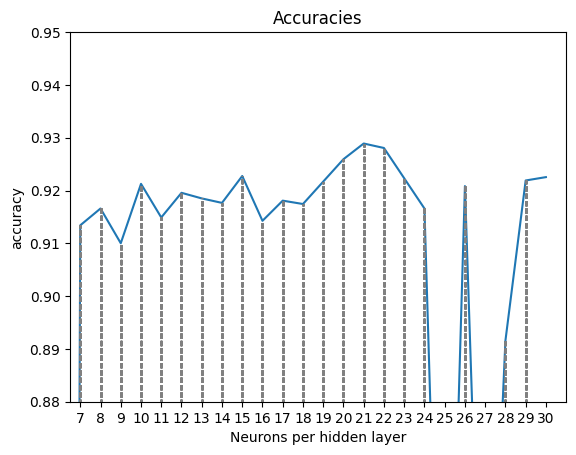

In [7]:
accuracies = [0,0,0,0,0,0,0]

for a in range(7, 31):
    accuracy = 0
    mlp = MLP([a])
    for j in range(4):
        mlp.train(training_x, training_y, validation_x, validation_y)
        predictedClasses = mlp.predict(validation_x)
        correct_predictions = 0
        correct_predictions = sum([1 for i in range(len(predictedClasses)) if np.argmax(predictedClasses[i]) == np.argmax(validation_y[i])])
        print("Accuracy for ", j, "in ", a, "was", correct_predictions / len(predictedClasses))
        accuracy += correct_predictions / len(predictedClasses)
    accuracy /= 4
    print("For", a, "neurons in hidden layer,", 'Accuracy: {:.2%}'.format(accuracy))
    accuracies.append(accuracy)

plt.plot(accuracies)
plt.title("Accuracies")
plt.xlabel("Neurons per hidden layer")
plt.ylabel("accuracy")
plt.xlim(6.5, 31)
plt.ylim(0.88, 0.95)
plt.xticks(range(7, 31))
for a in range(23):
    for i in range(7, 30):
        plt.vlines(i, ymin=0, ymax=accuracies[i], color='gray', linestyles='dashed', linewidth=1)

plt.show()

In [8]:
hiddenNeurons = accuracies.index(max(accuracies))
print("The # hidden neurons that gives the highest accuracy is", hiddenNeurons)

The # hidden neurons that gives the highest accuracy is 21


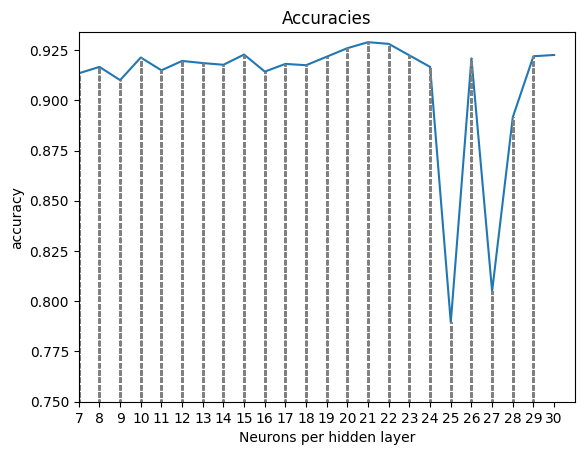

In [15]:
plt.plot(accuracies)
plt.title("Accuracies")
plt.xlabel("Neurons per hidden layer")
plt.ylabel("accuracy")
plt.xlim(7, 31)
plt.ylim(0.75, np.max(accuracies) + 0.005)
plt.xticks(range(7, 31))
for a in range(23):
    for i in range(7, 30):
        plt.vlines(i, ymin=0, ymax=accuracies[i], color='gray', linestyles='dashed', linewidth=1)

plt.show()

Let's tie it all up.

In [16]:
mlp = MLP([hiddenNeurons])
mlp.train(training_x, training_y, validation_x, validation_y)

The last step is to make a final check for possible over-fitting. We will run the predict() using new values 10 times each for validation set and training set, and plot the accuracies.

In [41]:
training_accuracies = [0,0,0,0,0,0,0,0,0,0]

for a in range(10, 71):
    accuracy = 0
    mlp = MLP([hiddenNeurons])
    mlp.setEpoch(a)
    mlp.train(training_x, training_y, validation_x, validation_y)
    for j in range(3):
        predictedClasses = mlp.predict(training_x)
        correct_predictions = 0
        correct_predictions = sum([1 for i in range(len(predictedClasses)) if np.argmax(predictedClasses[i]) == np.argmax(training_y[i])])
        print("Accuracy for ", j, "in ", a, "was", correct_predictions / len(predictedClasses))
        accuracy += correct_predictions / len(predictedClasses)
    accuracy /= 3
    print("Number =", a)
    print('Accuracy: {:.2%}'.format(accuracy))
    training_accuracies.append(accuracy)

##################################################################

validation_accuracies = [0,0,0,0,0,0,0,0,0,0]

for a in range(10, 71):
    accuracy = 0
    mlp = MLP()
    mlp.setEpoch(a)
    mlp.train(training_x, training_y, validation_x, validation_y)
    for j in range(3):
        predictedClasses = mlp.predict(validation_x)
        correct_predictions = 0
        correct_predictions = sum([1 for i in range(len(predictedClasses)) if np.argmax(predictedClasses[i]) == np.argmax(validation_y[i])])
        accuracy += correct_predictions / len(predictedClasses)
    accuracy /= 3
    print("Number =", a)
    print('Accuracy: {:.2%}'.format(accuracy))
    validation_accuracies.append(accuracy)

plt.plot(training_accuracies)
plt.plot(validation_accuracies)

plt.title("Accuracies")
plt.xlabel("# Epochs")
plt.ylabel("Accuracy")
plt.xlim(10, 71)
plt.ylim(0.870, max(accuracies) + 0.005)
plt.xticks(range(10, 71))

plt.show()

AttributeError: 'MLP' object has no attribute 'setEpoch'

Now let's predict the classes for the unknown (unlabelled) dataset.

In [17]:
unlabelled = np.genfromtxt("data/unknown.txt", delimiter=",")
predicted = mlp.predict(unlabelled)
result = []
for i in range(len(predicted)):
    result.append(np.argmax(predicted[i]) + 1) # There is no class 0, and therefore +1
print("Unknown dataset is labelled as following:")
print(result)

Unknown dataset is labelled as following:
[2, 6, 7, 1, 6, 5, 1, 3, 7, 7, 3, 3, 1, 3, 6, 4, 2, 4, 2, 2, 7, 5, 6, 6, 5, 1, 5, 3, 1, 6, 6, 4, 4, 4, 4, 4, 5, 2, 3, 7, 4, 6, 5, 5, 5, 7, 5, 4, 5, 1, 5, 5, 2, 1, 6, 3, 1, 7, 1, 1, 3, 6, 3, 2, 7, 2, 2, 2, 7, 7, 7, 6, 7, 1, 4, 1, 4, 4, 1, 7, 1, 7, 6, 4, 4, 2, 3, 2, 1, 7, 6, 2, 2, 1, 2, 7, 2, 2, 5, 2, 5, 7, 5, 5, 2, 6, 5, 6, 2, 3, 7, 4, 1, 5, 5, 7, 5, 2, 4, 4, 7, 1, 2, 1, 1, 4, 7, 4, 7, 7, 7, 6, 6, 7, 7, 4, 4, 4, 3, 3, 3, 4, 1, 2, 2, 6, 6, 5, 4, 7, 7, 4, 1, 7, 1, 3, 7, 4, 3, 6, 7, 7, 3, 4, 1, 5, 6, 2, 5, 5, 3, 1, 6, 4, 7, 3, 3, 5, 5, 3, 3, 4, 1, 1, 2, 3, 3, 2, 5, 3, 4, 6, 1, 6, 6, 2, 2, 3, 6, 7, 7, 2, 5, 3, 5, 5, 7, 4, 2, 2, 3, 6, 2, 6, 6, 4, 2, 6, 1, 3, 1, 3, 6, 2, 2, 6, 7, 1, 6, 1, 1, 5, 2, 4, 5, 4, 6, 4, 7, 7, 4, 1, 5, 5, 3, 1, 1, 6, 6, 5, 4, 4, 6, 2, 6, 6, 6, 1, 5, 3, 5, 3, 1, 6, 1, 2, 6, 6, 6, 2, 4, 5, 3, 5, 3, 3, 4, 7, 6, 4, 3, 6, 7, 7, 2, 2, 7, 2, 1, 4, 6, 3, 4, 5, 4, 6, 4, 7, 4, 4, 2, 1, 2, 5, 2, 2, 1, 3, 3, 1, 1, 7, 2, 4, 6, 7, 2, 2, 6, 

With the unknown dataset labelled, let's put them in a `.txt` file for exporting.

In [18]:
# Write the string to a file
my_string = '\n'.join(map(str, result))
filename = '62_classes.txt'
with open(filename, 'w') as file:
    file.write(my_string)
    print("File created with name ")
    print(filename)

File created with name 
62_classes.txt


Let's create the `confusion matrix`.

The values on the diagonal show the number of true positives, meaning the number of instances that were predicted correctly for each class. So for example, in col-row 1, the number represents the number of instances that were predicted to be in class 1 and actually belong to class 1.

The values above and below the diagonal represent the instances that are misclassified. So for example, in col 2 row 1, the number represents the number of instances that were predicted to be in class 1 and actually belong to class 2.

In [ ]:
predictedOutput = np.argmax(mlp.forward_propagation(test_x), axis=1)
confusion_matrix = np.zeros((mlp.output_size, mlp.output_size), dtype=int)

for i in range(len(test_y)):
    true_label = np.argmax(test_y[i])
    predicted_label = predictedOutput[i]
    confusion_matrix[true_label][predicted_label] += 1

print("Below is the confusion matrix:\n")
print(confusion_matrix)


An interesting experiment to observe would be to train our network 10 times, each time with different initial weights, and observe the impact on performance. Since our weights are initialized random we just have to create a new MLP 10 times and train it.

In [35]:
initial_weights = []
accuracies = []

for i in range(1,11):
    mlp = MLP([hiddenNeurons])
    initial_weights.append(mlp.weights)
    mlp.train(training_x, training_y, validation_x, validation_y)

    predictedClasses = mlp.predict(validation_x)
    correct_predictions = sum([1 for i in range(len(predictedClasses)) if np.argmax(predictedClasses[i]) == np.argmax(validation_y[i])])
    accuracies.append(correct_predictions / len(predictedClasses))
    print("Iteration number", i, "completed")

Iteration number 1 completed
Iteration number 2 completed
Iteration number 3 completed
Iteration number 4 completed
Iteration number 5 completed
Iteration number 6 completed
Iteration number 7 completed
Iteration number 8 completed
Iteration number 9 completed
Iteration number 10 completed


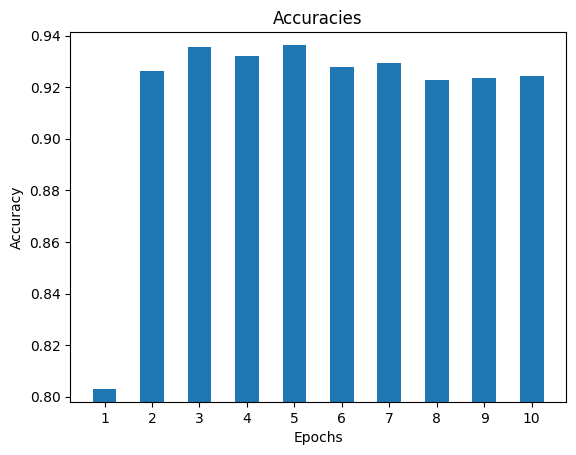

The lowest accuracy was  0.8030560271646859
The highest accuracy was  0.9363327674023769
Max impact on accuracy was 15.32%
[array([[ 0.83144539, -0.79252685,  0.31648283, -1.24337676, -1.01117941,
        -1.7021896 ,  1.06166792, -0.4358457 ,  0.53113511,  0.38681216],
       [ 0.18697421, -0.04185311, -1.79694093,  0.22824177, -0.98160673,
        -0.35461221, -0.21384937, -1.04036672, -0.58669326,  0.11360914],
       [ 0.64480039, -0.32441414,  0.92119252, -1.83528056,  0.14618295,
         0.72692071,  0.1849674 , -0.98892442,  2.41904993, -1.4273354 ],
       [-1.70434205,  0.07322692, -0.31549631,  1.52348705,  0.16180451,
         0.71747432,  0.65430768,  0.65142042, -0.58760492,  0.4513951 ],
       [ 1.36762681,  0.17751181,  0.44386835, -2.72716245, -1.53613753,
        -1.90923289,  1.37049094, -1.26712006,  0.27881841,  0.54080683],
       [ 0.23977946,  2.07935963,  2.48618002, -2.11551894,  0.06731738,
         0.98145982,  1.88142969,  0.59785635,  1.54403984,  1.20560

In [38]:
mini = np.min(accuracies)
maxi = np.max(accuracies)

x_axis = np.arange(1,len(accuracies)+1)
y_axis = accuracies
plt.bar(x_axis, y_axis, width=0.5)
plt.title("Accuracies")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.ylim(mini - 0.005, maxi + 0.005)
plt.xticks(range(1,11))
plt.show()

print("The lowest accuracy was ", mini)
print("The highest accuracy was ", maxi)


percentage_difference = abs(maxi - mini) / ((maxi + mini) / 2) * 100

print("Max impact on accuracy was {:.2f}%".format(percentage_difference))

print(initial_weights[0])
print(initial_weights[4])